In [43]:
import numpy as np
import pandas as pd
import plotly.express as px

In [44]:
# Load the CSV file, without skipping any rows initially
file_path = "/Users/javanmardi/Work/IGSB/Bone2Gene_Survey_Study/3_progressive_results/B2G Survey_7_1_2024.csv"
initial_df = pd.read_csv(file_path, sep=';', header=None)

In [45]:
# Set the first row as the header of the dataframe
headers = initial_df.iloc[0]
questions = initial_df.iloc[1]
header_question_dict = dict(zip(headers, questions))


In [46]:
# Print the dictionary to verify
print("Header to Question Mapping:")
for header, question in header_question_dict.items():
    print(f"{header}: {question}")

Header to Question Mapping:
StartDate: Start Date
EndDate: End Date
Status: Response Type
IPAddress: IP Address
Progress: Progress
Duration (in seconds): Duration (in seconds)
Finished: Finished
RecordedDate: Recorded Date
ResponseId: Response ID
RecipientLastName: Recipient Last Name
RecipientFirstName: Recipient First Name
RecipientEmail: Recipient Email
ExternalReference: External Data Reference
LocationLatitude: Location Latitude
LocationLongitude: Location Longitude
DistributionChannel: Distribution Channel
UserLanguage: User Language
Q2: Are you involved in caring for or in the diagnostic process of patients with known or possible rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature)?
Q3: You have selected that you are not involved in either the diagnostic process or pre/post care of patients with rare bone disease. Please describe your interest in rare bone disease.
Q4: What is your primary role in or related to healthcare?
Q5:

In [47]:
# Now, read the CSV again, this time skipping the first three rows and setting the first row as header
data_df = pd.read_csv(file_path, sep=';', skiprows=[1, 2])

# Show the first few rows of the dataframe to verify
# print("\nData Preview:")
data_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q29,Q30,Q26,Q31,Q32,Q33,Q34,Q35,Q36,Q39
0,03.03.24 08:54,03.03.24 08:59,IP Address,91.21.244.172,49,255,False,10.03.24 09:59,R_GsjgGtb1iWqA3lY,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20.03.24 23:39,20.03.24 23:51,IP Address,149.171.5.177,100,707,True,20.03.24 23:51,R_G1NYUbKm3zBogud,NaN,...,NaN,NaN,LLMs for more efficient knowledge retrieval fr...,Yes,"Data privacy and security,Compliance with medi...",NaN,Very concerned,Very important,explainability is less of an issue if diagnosi...,andreas.zankl@sydney.edu.au
2,25.03.24 10:51,25.03.24 11:03,IP Address,193.2.253.126,100,682,True,25.03.24 11:03,R_GfP4WslsdJbXYqA,NaN,...,NaN,NaN,Combining imaging to genetic results interpret...,Yes,Interpretability of AI algorithms,NaN,Somewhat concerned,Very important,/,primoz.kotnik@mf.uni-lj.si
3,26.03.24 09:42,26.03.24 10:14,IP Address,195.113.82.2,100,1882,True,26.03.24 10:14,R_GWvmaj6KebYNzQ5,NaN,...,NaN,NaN,maybe growth curve assessment,Yes,"Data privacy and security,Compliance with medi...",NaN,"Unsure, need to see research results first.",Slightly important,NaN,NaN
4,27.03.24 11:44,27.03.24 12:04,IP Address,193.206.71.4,100,1201,True,27.03.24 12:04,R_Gj06bhZ91wFXgsT,NaN,...,NaN,NaN,It could be used to improve the analysis of ge...,Yes,Informed consent for AI-based diagnostics,NaN,Not very concerned,Very important,NaN,NaN


In [48]:
#the finished surveys

finished_df=data_df[data_df['Finished']==True]
finished_df.shape

(92, 54)

In [49]:
# Identify empty columns
empty_columns = finished_df.isna().all()

# Drop empty columns
data = finished_df.drop(columns=empty_columns[empty_columns].index)

In [50]:
data.keys()

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage', 'Q2', 'Q3', 'Q4', 'Q8', 'Q9', 'Q20', 'Q19', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q21', 'Q22',
       'Q23', 'Q38', 'Q24', 'Q25', 'Q27', 'Q28', 'Q29', 'Q30', 'Q26', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q39'],
      dtype='object')

# Visualisations and Analysis

#### Q2: Are you involved in caring for or in the diagnostic process of patients with known or possible rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature)?

In [51]:
header_question_dict['Q2']

'Are you involved in caring for or in the diagnostic process of patients with known or possible rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature)?'

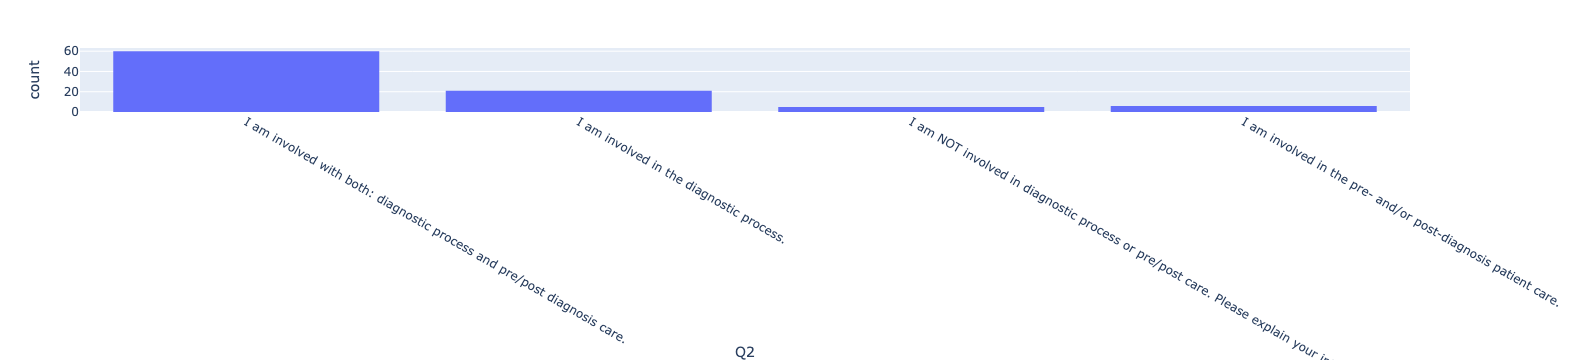

In [52]:
fig = px.histogram(data, x='Q2')
fig.show()

In [53]:
data['Q2'].unique()

array(['I am involved with both: diagnostic process and pre/post diagnosis care.',
       'I am involved in the diagnostic process.',
       'I am NOT involved in diagnostic process or pre/post care. Please explain your interest in this survey.',
       'I am involved in the pre- and/or post-diagnosis patient care.'],
      dtype=object)

In [54]:
# Get row numbers (indices) of those answering 
condition = data['Q2'] == 'I am NOT involved in diagnostic process or pre/post care. Please explain your interest in this survey.'
row_numbers = data[condition].index
print(row_numbers)

Int64Index([7, 12, 23, 64, 72], dtype='int64')


In [55]:
data[condition]['Q3']

7                                                   NaN
12                                                  NaN
23    Previously led childrenâ€™s bone disease servi...
64                           Research activities on RDs
72                                        Endocrinology
Name: Q3, dtype: object

***
#### Q4: What is your primary role in or related to healthcare?

In [56]:
header_question_dict['Q4']

'What is your primary role in or related to healthcare?'

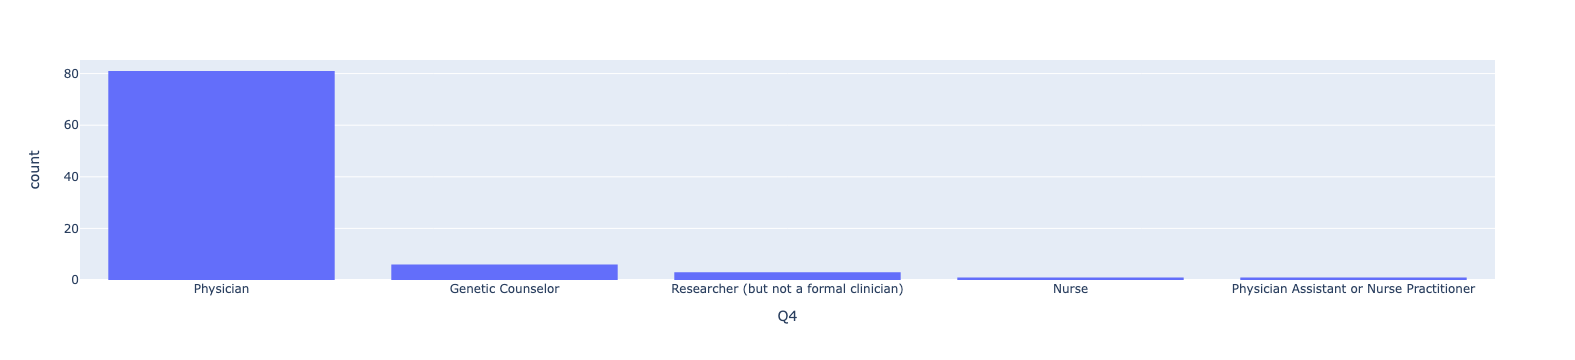

In [57]:
fig = px.histogram(data, x='Q4')
fig.show()

***
#### Q8: Which title best describes your position (please check if you have a dual function)?

In [58]:
header_question_dict['Q8']

'Which title best describes your position (please check if you have a dual function)?'

In [59]:
data['Q8'].unique()

array(['Medical Geneticist', 'Endocrinologist,Pediatrician',
       'Radiologist', 'Endocrinologist,Medical Geneticist',
       'Other, please specify', 'Endocrinologist', 'Pediatrician',
       'Pediatrician,Other, please specify', nan,
       'Medical Geneticist,Other, please specify', 'Orthopaedic surgeon',
       'Internist', 'Medical Geneticist,Pediatrician',
       'Radiologist,Other, please specify'], dtype=object)

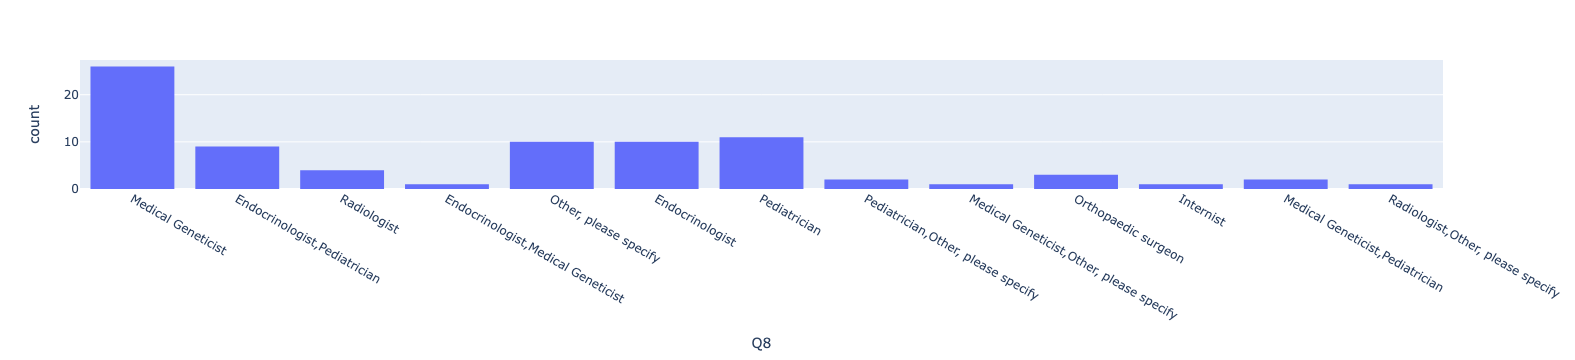

In [60]:
fig = px.histogram(data, x='Q8')
fig.show()

***
#### How many years of experience do you have in the healthcare field?

In [61]:
header_question_dict['Q10']

'How many years of experience do you have in the healthcare field?'

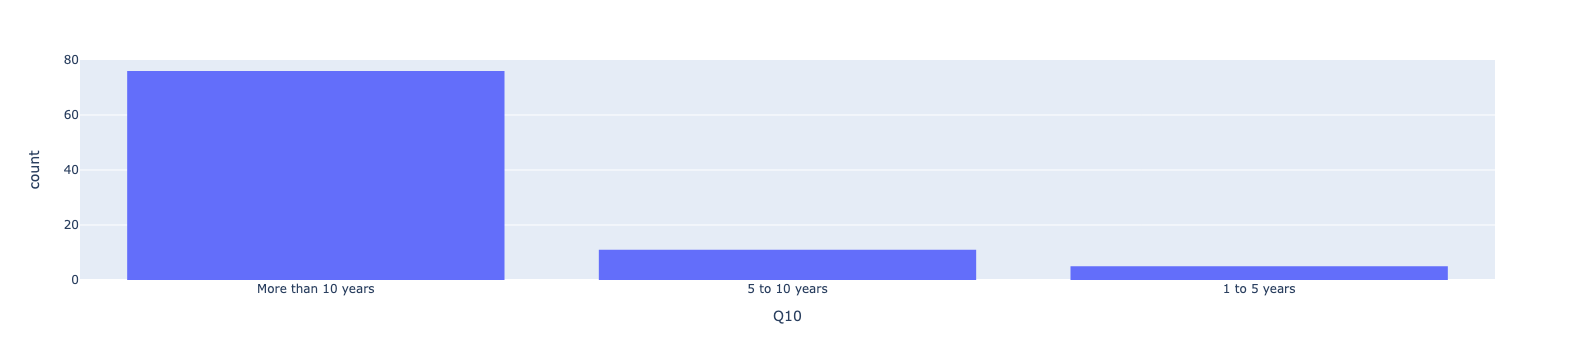

In [62]:
fig = px.histogram(data, x='Q10')
fig.show()

In [63]:
# Calculate frequency of values in the Q10 column
value_counts = data['Q10'].value_counts().reset_index()
value_counts.columns = ['Value', 'Count']

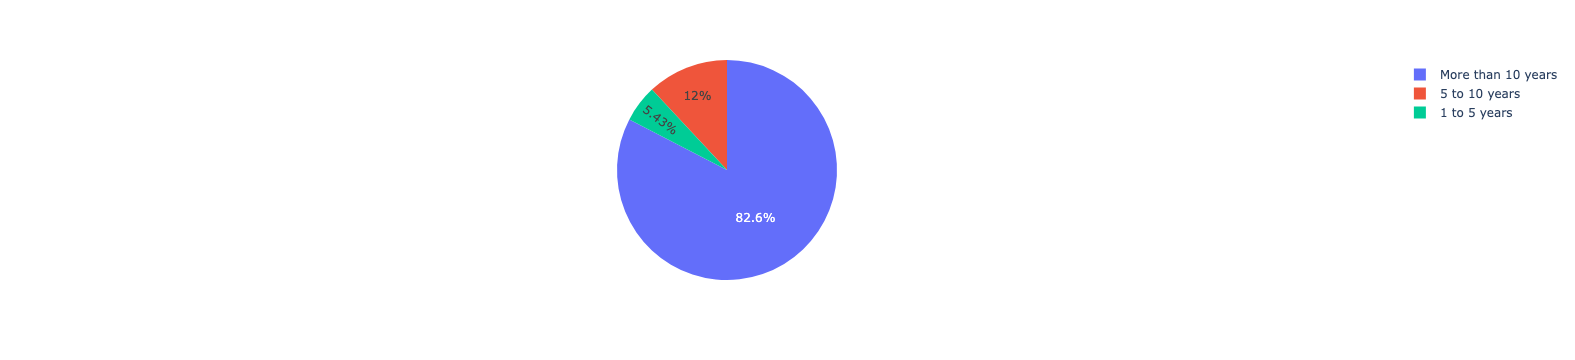

In [66]:
# Plot a pie chart using Plotly
fig = px.pie(value_counts, names='Value', values='Count')
fig.show()

***
#### Q11: Which type of healthcare facility best describes where you primarily work (i.e., where do you work most often)?

In [67]:
header_question_dict['Q11']

'Which type of healthcare facility best describes where you primarily work (i.e., where do you work most often)?'

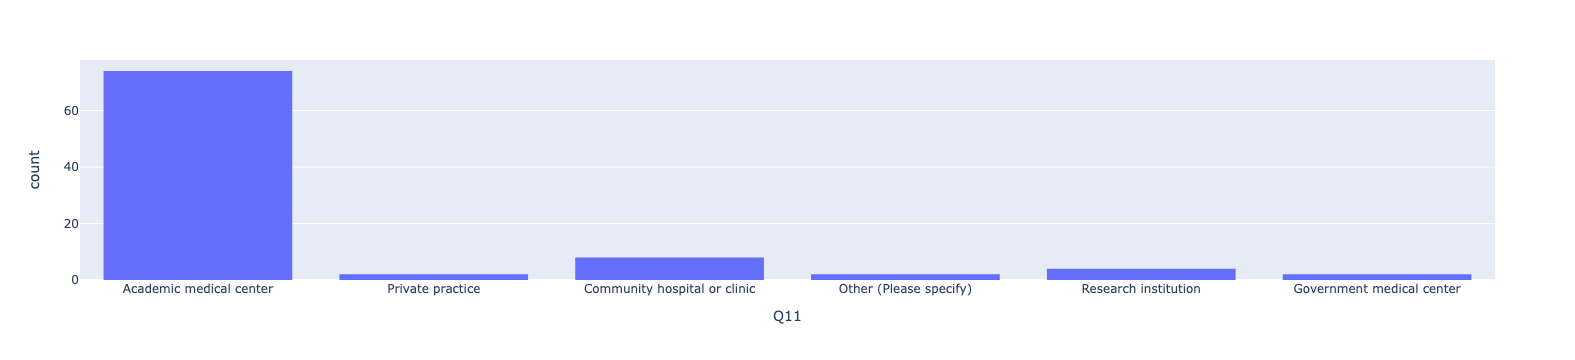

In [69]:
fig = px.histogram(data, x='Q11')
fig.show()

***
#### Q13: Please enter the country where you primarily work

In [72]:
header_question_dict['Q13']

'Please enter the country where you primarily work.'

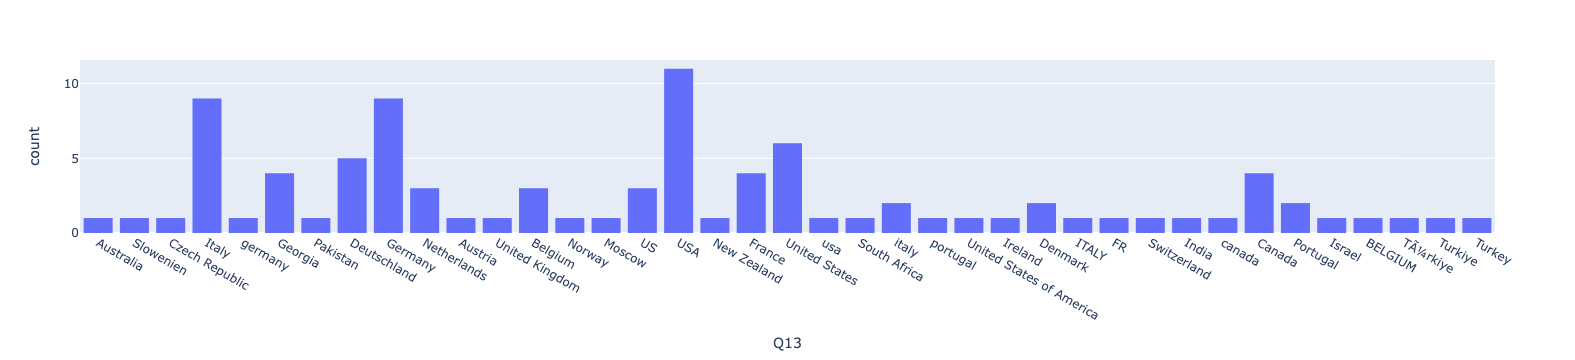

In [73]:
fig = px.histogram(data, x='Q13')
fig.show()

***
#### Q14, 15, 16: Number of patients 

In [74]:
header_question_dict['Q14']

'Approximately, how many patients with known or suspected rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature) do you see per month?'

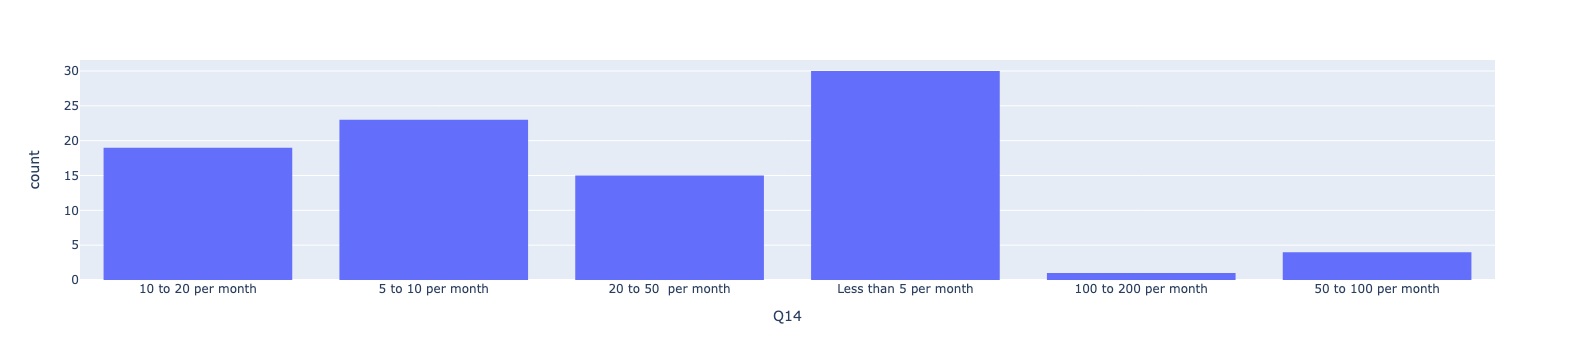

In [76]:
fig = px.histogram(data, x='Q14')
fig.show()

In [77]:
header_question_dict['Q15']

'Approximately, how many patients with known or suspected rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature) does your clinic see per month?'

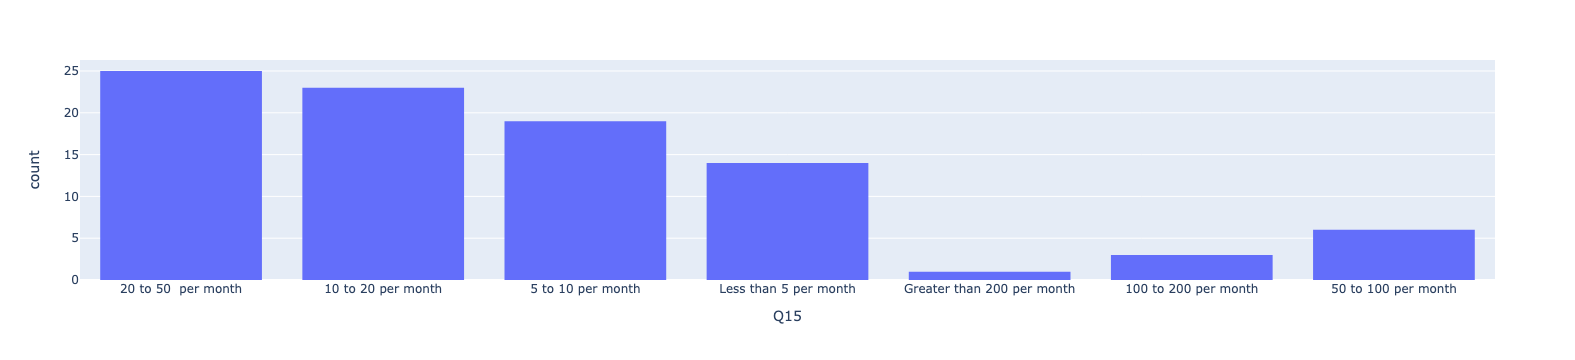

In [78]:
fig = px.histogram(data, x='Q15')
fig.show()

In [79]:
header_question_dict['Q16']

'Approximately, how many patients with known or suspected rare bone diseases (or conditions where skeletal anomalies and related findings are an important feature) does your entire facility see per month?'

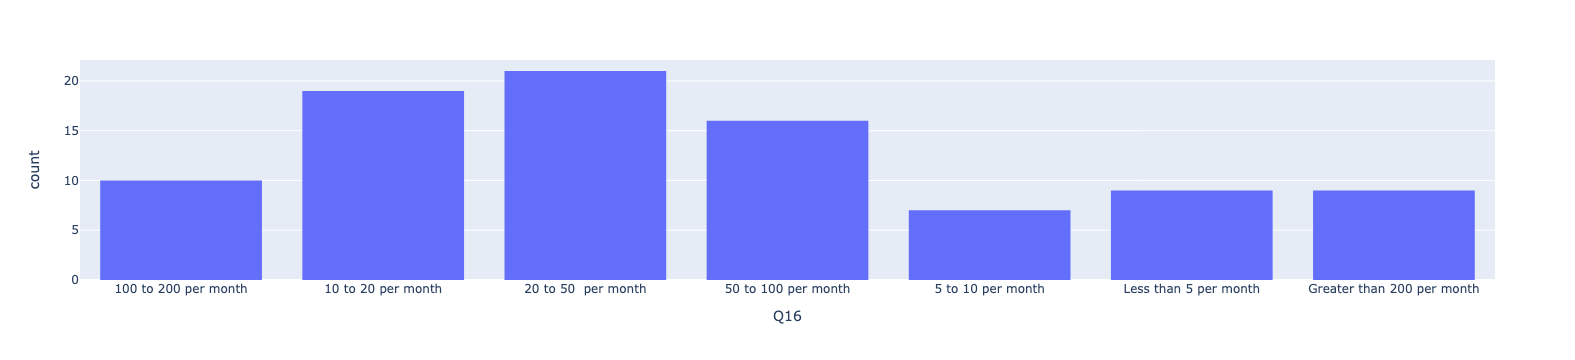

In [80]:
fig = px.histogram(data, x='Q16')
fig.show()

*** 
#### Q21: In your opinion, how important are medical images (i.e., x-rays, MRI, etc.) in the diagnosis of rare bone diseases?

In [81]:
header_question_dict['Q21']

'In your opinion, how important are medical images (i.e., x-rays, MRI, etc.) in the diagnosis of rare bone diseases?'

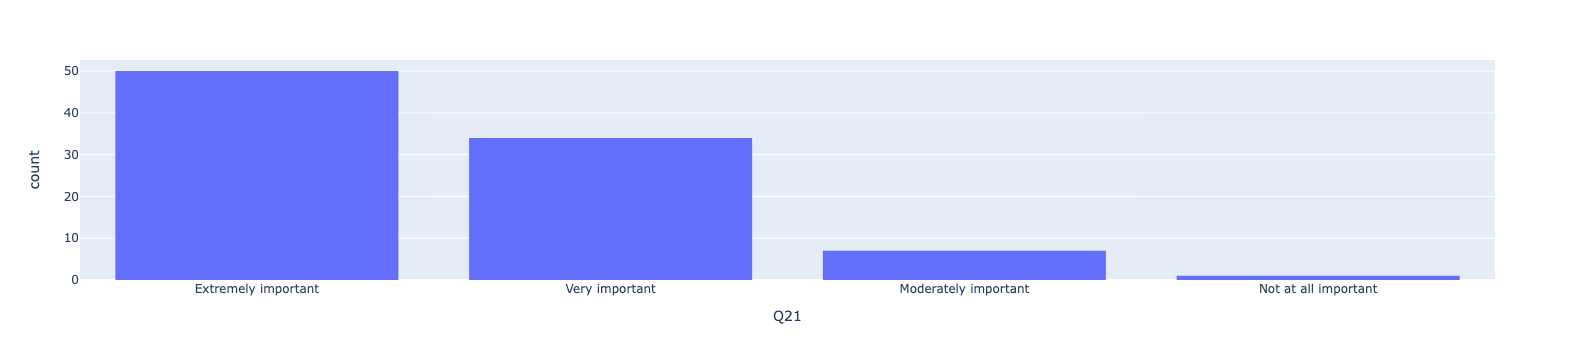

In [83]:
fig = px.histogram(data, x='Q21')
fig.show()

There should be a 5th option too that must appear in the viz

***
#### Q22: Which imaging type do you think is the most important modality for the postnatal diagnosis of rare bone diseases?

In [84]:
header_question_dict['Q22']

'Which imaging type do you think is the most important modality for the postnatal diagnosis of rare bone diseases?'

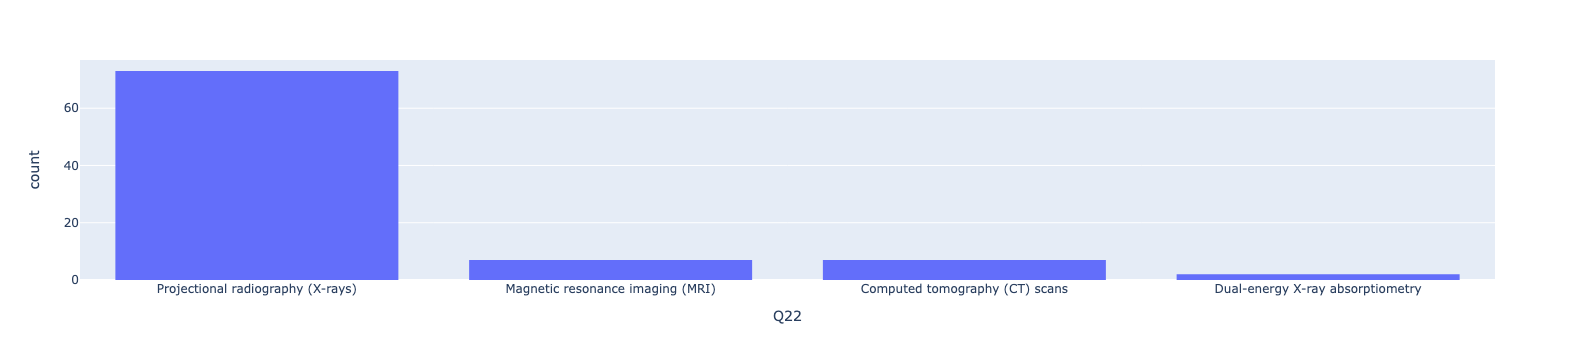

In [86]:
fig = px.histogram(data, x='Q22')
fig.show()

***
#### Q23: How difficult do you think it is to delineate between different rare bone diseases based on visual inspection of patients' radiographs? (for answering this question you may exclude the disorders with highly characteristic features such as achondroplasia)

In [87]:
header_question_dict['Q23']

"How difficult do you think it is to delineate between different rare bone diseases based on visual inspection of patients' radiographs? (for answering this question you may exclude the disorders with highly characteristic features such as achondroplasia)."

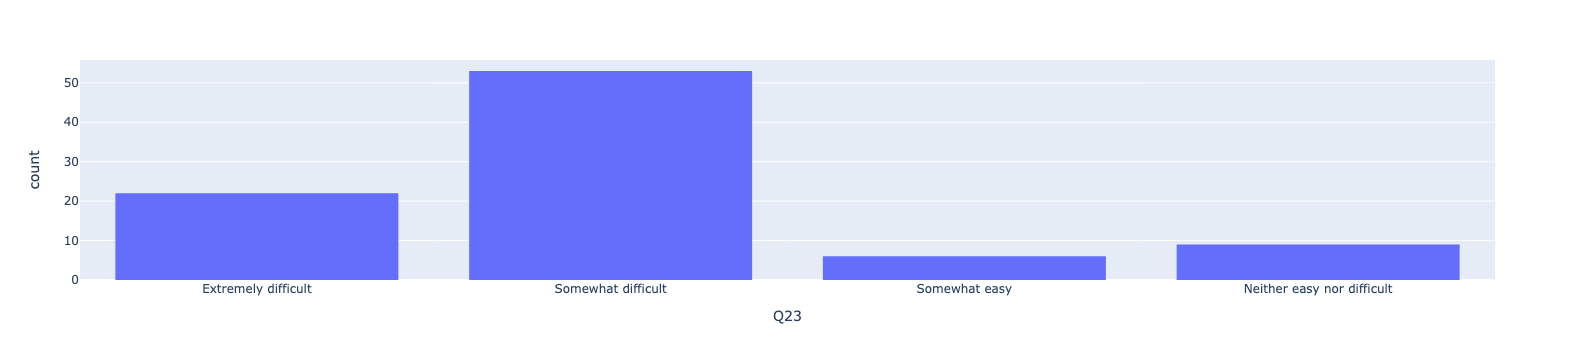

In [89]:
fig = px.histogram(data, x='Q23')
fig.show()

There should be a 5th option too that must appear in the viz

***
#### Q24: If an image recognition AI is developed that provides you with a prioritized list of syndromes based on a radiograph, how likely are you to consider integrating it into your current diagnostic workflow?

In [90]:
header_question_dict['Q24']

'If an image recognition AI is developed that provides you with a prioritized list of syndromes based on a radiograph, how likely are you to consider integrating it into your current diagnostic workflow?'

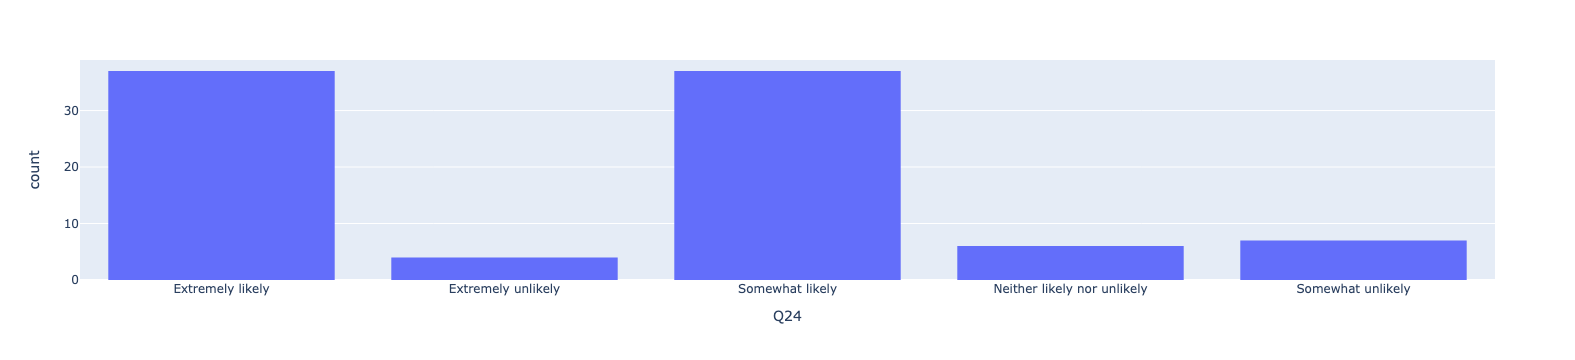

In [91]:
fig = px.histogram(data, x='Q24')
fig.show()

***
#### Q25: Have you previously used or are you currently using any digital tools (computer software, AI, or machine learning) in your diagnostic workflow?

In [92]:
header_question_dict['Q25']

'Have you previously used or are you currently using any digital tools (computer software, AI, or machine learning) in your diagnostic workflow?'

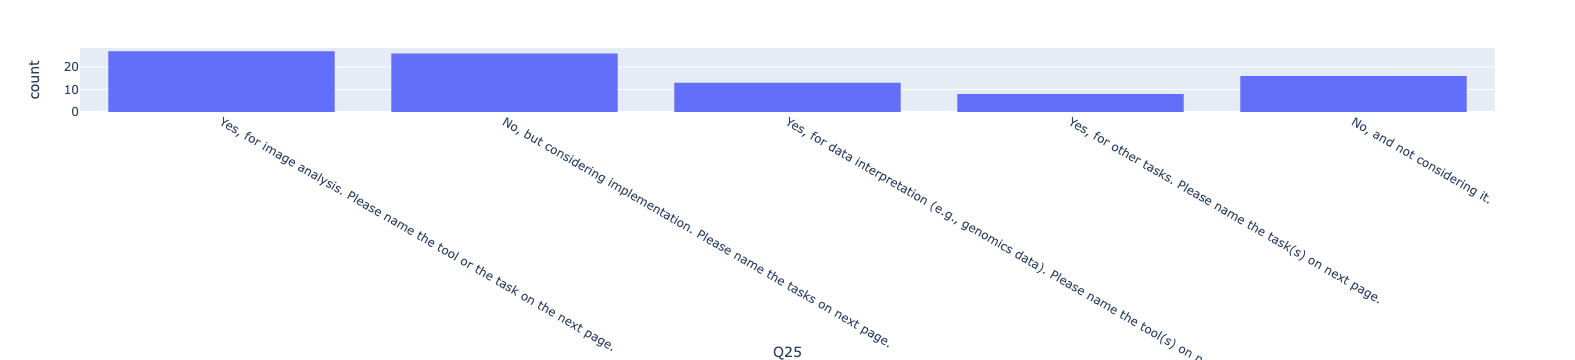

In [93]:
fig = px.histogram(data, x='Q25')
fig.show()

***
#### Q26: Are there specific areas (other than image recognition) within the diagnostic, management, or treatment process where you believe AI could make a positive impact?

In [96]:
header_question_dict['Q26']

'Are there specific areas (other than image recognition) within the diagnostic, management, or treatment process where you believe AI could make a positive impact?'

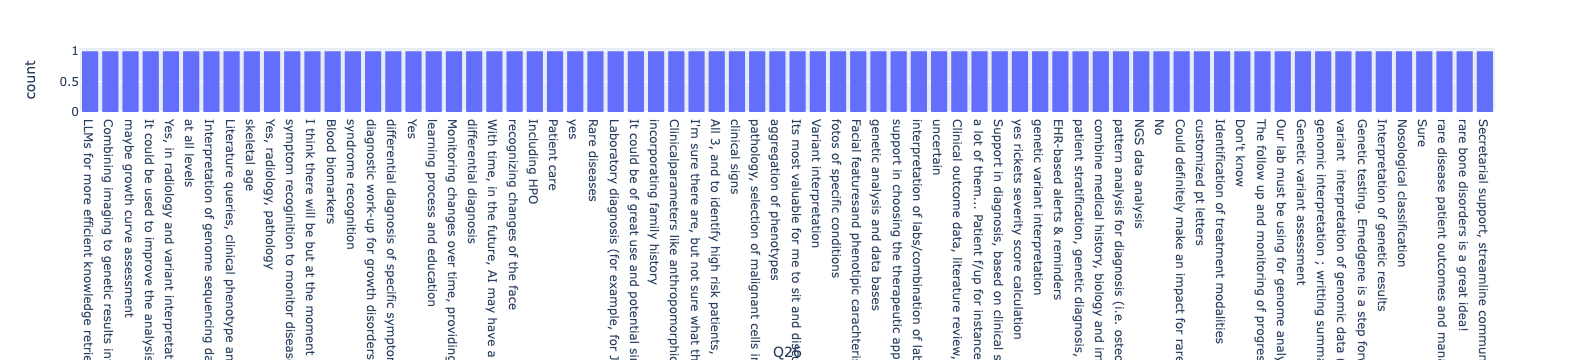

In [97]:
fig = px.histogram(data, x='Q26')
fig.show()

***
#### Q27, 28, 29,30: tools and/or tasks they use already!

In [98]:
header_question_dict['Q27']

'What tools and or tasks did you use AI based image analysis?'

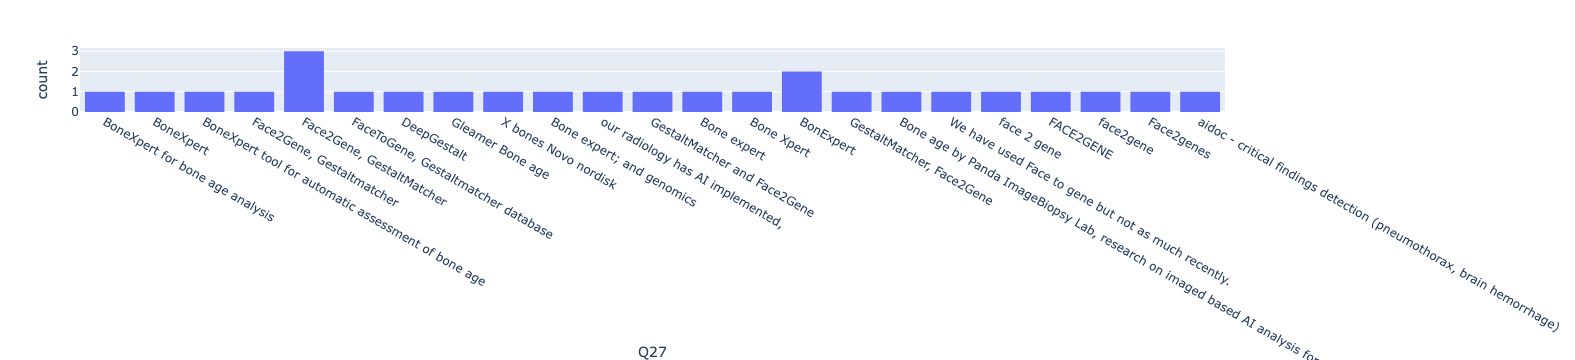

In [100]:
fig = px.histogram(data, x='Q27')
fig.show()

In [102]:
header_question_dict['Q29']

'Please describe the tasks.'

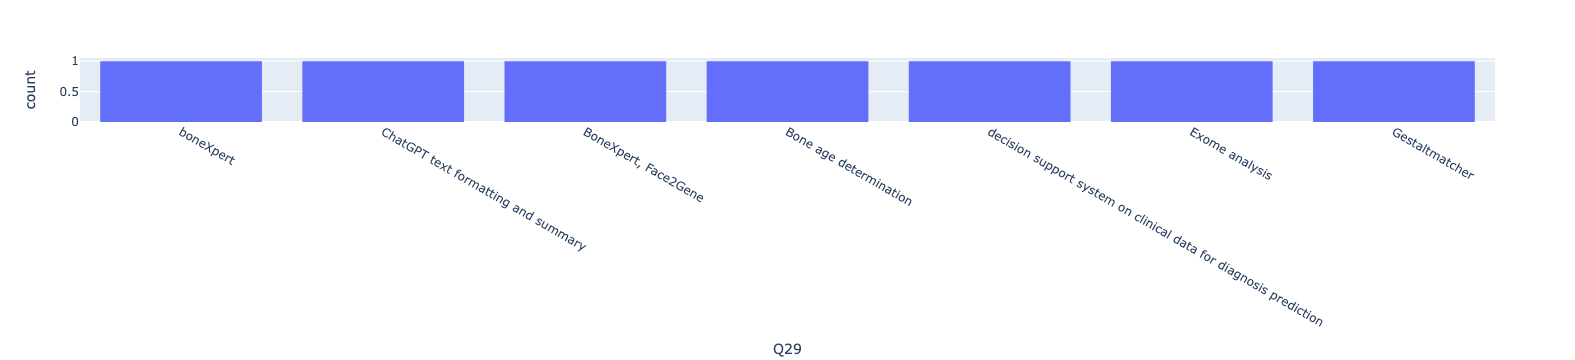

In [103]:
fig = px.histogram(data, x='Q29')
fig.show()

In [104]:
header_question_dict['Q28']

'What tools did you use for data interpretation?'

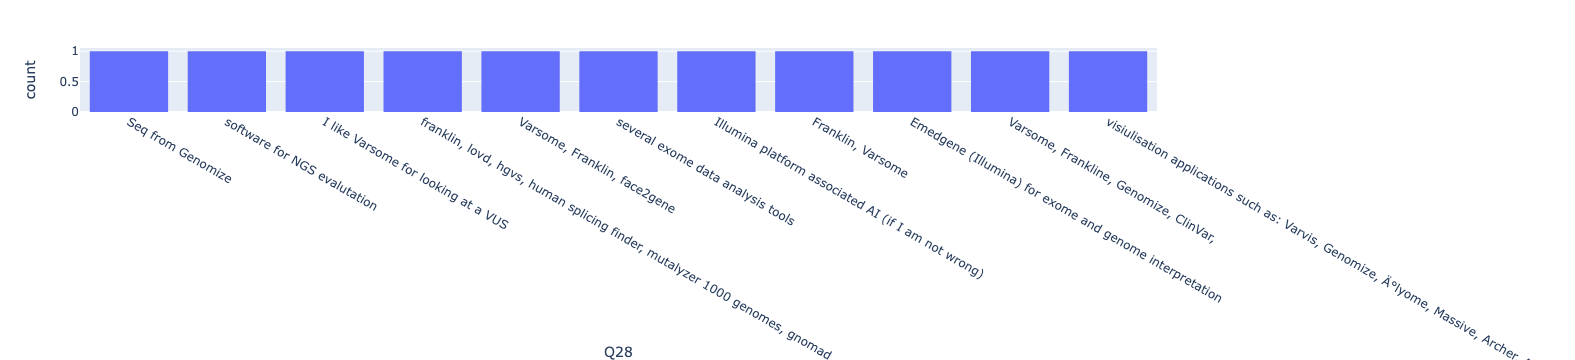

In [105]:
fig = px.histogram(data, x='Q28')
fig.show()

In [106]:
header_question_dict['Q30']

'Please describe the tasks.'

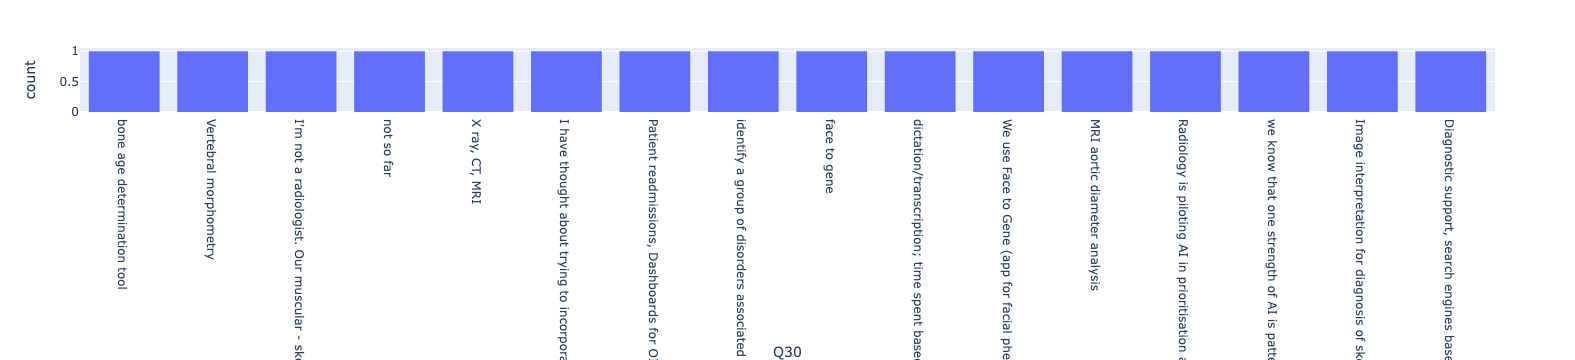

In [107]:
fig = px.histogram(data, x='Q30')
fig.show()

***
#### Q31: Would you be willing to do additional training to learn to utilize an image recognition AI tool for rare bone disease diagnosis?

In [109]:
header_question_dict['Q31']

'Would you be willing to do additional training to learn to utilize an image recognition AI tool for rare bone disease diagnosis?'

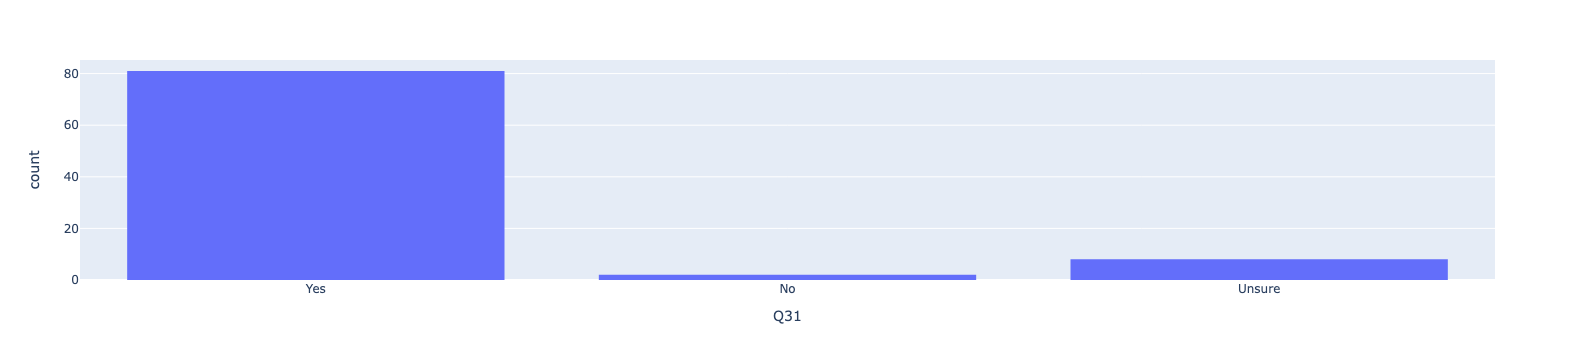

In [110]:
fig = px.histogram(data, x='Q31')
fig.show()

***
#### Q32: What regulatory considerations or ethical concerns do you foresee in implementing  image recognition AI for rare bone disease diagnosis? Select all that apply.

In [112]:
header_question_dict['Q32']

'What regulatory considerations or ethical concerns do you foresee in implementing  image recognition AI for rare bone disease diagnosis? Select all that apply.'

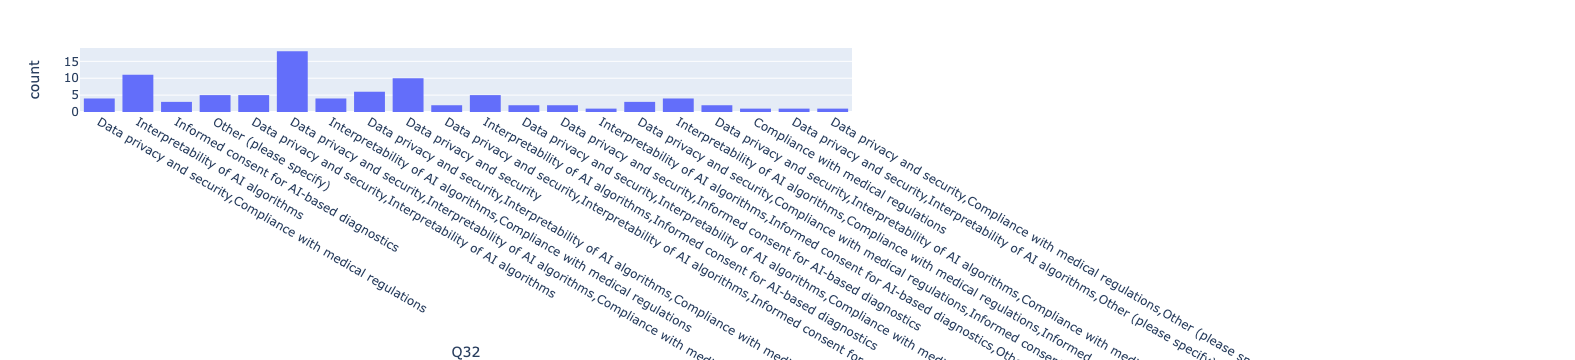

In [113]:
fig = px.histogram(data, x='Q32')
fig.show()

I should seprate and plot the frequency

***
#### Q33: Please describe other concerns in implementing image recognition AI for rare bone disease diagnosis.

In [114]:
header_question_dict['Q33']

'Please describe other concerns in implementing image recognition AI for rare bone disease diagnosis.'

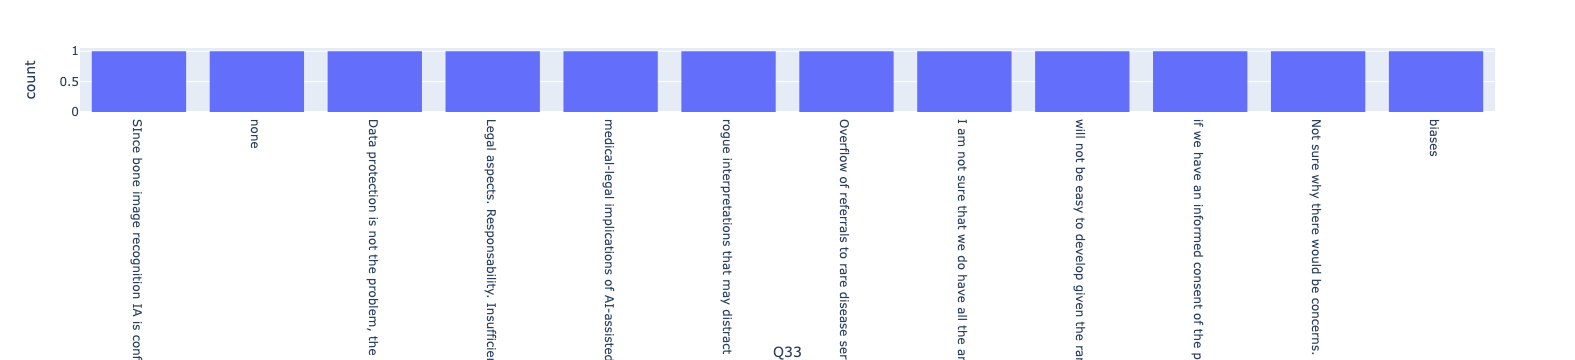

In [115]:
fig = px.histogram(data, x='Q33')
fig.show()

***
#### Q34: How concerned are you about the potential for AI-related errors in the diagnosis of rare bone diseases?

In [116]:
header_question_dict['Q34']

'How concerned are you about the potential for AI-related errors in the diagnosis of rare bone diseases?'

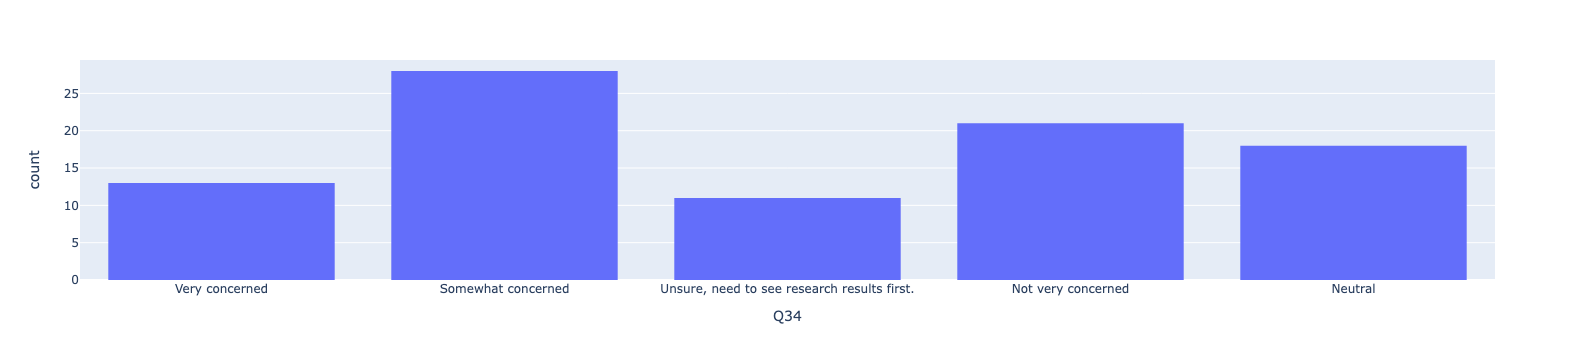

In [117]:
fig = px.histogram(data, x='Q34')
fig.show()

***
#### Q35: As long as the image recognition AI algorithms are confirmed (through trial studies) to perform their tasks accurately, how important to you is the explainability of these algorithms?

In [120]:
header_question_dict['Q35']

'As long as the image recognition AI algorithms are confirmed (through trial studies) to perform their tasks accurately, how important to you is the explainability of these algorithms?'

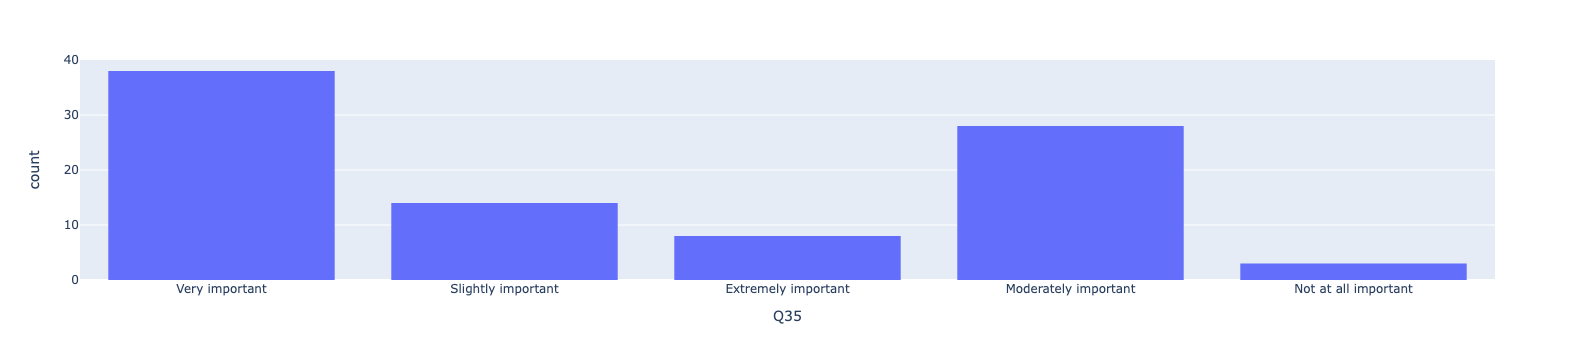

In [121]:
fig = px.histogram(data, x='Q35')
fig.show()

***
#### Q36: Optional: Please provide any additional feedback about this survey or AI based tools in diagnosis of rare bone disease.

In [124]:
header_question_dict['Q36']

'Optional: Please provide any additional feedback about this survey or AI based tools in diagnosis of rare bone disease.'

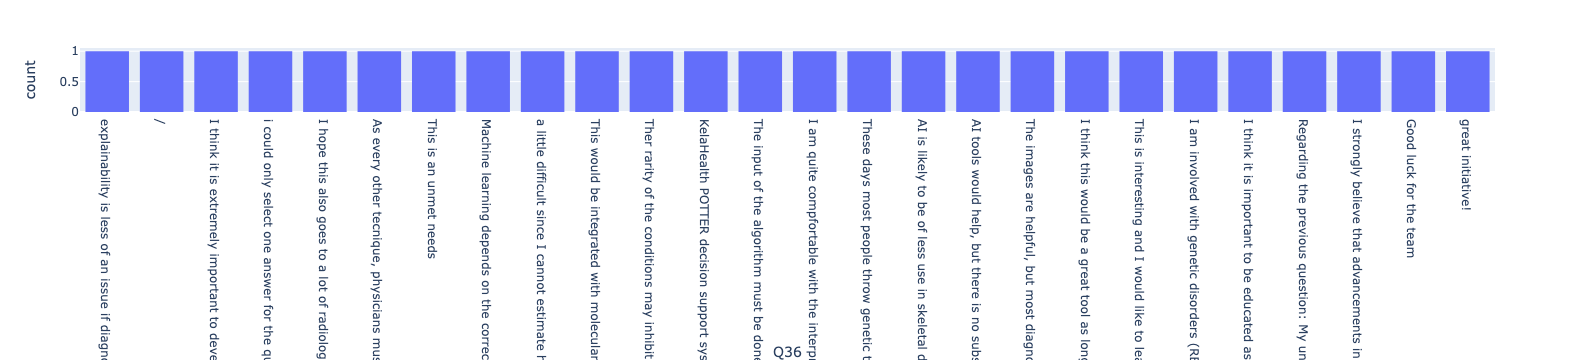

In [125]:
fig = px.histogram(data, x='Q36')
fig.show()